In [52]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
mean_01 = np.array([1.2 , 0.4])
mean_02 = np.array([3.6 , 4.2])

cov_01 = np.array([[1.0,0.1], [0.1, 1.0]])
cov_02 = np.array([[1.0,0.1], [0.1, 1.2]])

dist_01 = np.random.multivariate_normal(mean_01, cov_01, 500)
dist_02 = np.random.multivariate_normal(mean_02, cov_02, 500)

print dist_01.shape, dist_02.shape

(500, 2) (500, 2)


In [54]:
rows = dist_01.shape[0] + dist_02.shape[0]
cols = dist_01.shape[1] + 1

data = np.zeros((rows,cols))
print data.shape

data[:dist_01.shape[0], :2] = dist_01
data[dist_01.shape[0]:, :2] = dist_02
data[dist_01.shape[0]:, -1] += 1.0

print data.shape

(1000, 3)
(1000, 3)


[[ 2.3801795   4.61703613  1.        ]
 [ 3.64841966  5.46954459  1.        ]
 [ 0.77311373 -0.10935233  0.        ]
 [ 4.84098692  5.39591906  1.        ]
 [ 3.94369662  3.64786639  1.        ]]


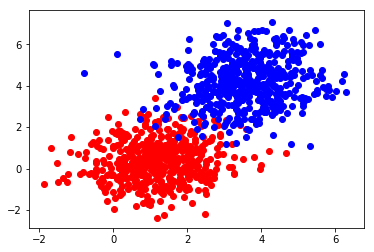

In [55]:
np.random.shuffle(data)

print data[:5]

plt.scatter( dist_01[:,0], dist_01[:,1], c = 'red' )
plt.scatter( dist_02[:, 0], dist_02[:, 1], c = 'blue' )
plt.show()

In [56]:
split = int(0.70*data.shape[0])

X_train = data[:split, :2]
X_test = data[split:, :2]

y_train = data[:split, -1]
y_test = data[split:, -1]

print X_train.shape,y_train.shape
print X_test.shape,y_test.shape

(700, 2) (700,)
(300, 2) (300,)


In [57]:
def sigmoid(z):
    return 1.0/(1+np.exp(-1*z))

def hypothesis(x,w,b):
    h = (x*w).sum() + b
    return sigmoid(h)

# Binary CrossEntropy
def get_error(x,w,y_true,b):
    err = 0.0
    
    m = x.shape[0]
    for ix in range(m):
        if y_true[ix] == 0:
            err += (np.log(1-hypothesis(x[ix],w,b)))
        else:
            err += (np.log(hypothesis(x[ix],w,b)))
    
    err = err/m
    return err

In [58]:
def get_gradients(x,w,y_true,b):
    grad_w = np.zeros(w.shape[0])
    grad_b = 0.0
    
    m = x.shape[0]
    for ix in range(m):
        grad_w += (y_true[ix] - hypothesis(x[ix], w , b))*(-1*x[ix])
        grad_b += (y_true[ix] - hypothesis(x[ix], w , b))*(-1)
        
    grad_w = grad_w/m
    grad_b = grad_b/m
    
    return [grad_w, grad_b]

In [59]:
def optimizer(x, w , y_true, b, learning_rate=0.01):
    error = get_error(x, w, y_true, b)
    [grad_w, grad_b] = get_gradients(x, w , y_true, b)
    
    w = w - learning_rate*grad_w
    b = b - learning_rate*grad_b
    
    return error, w ,b

In [60]:
def predict(x_sample, w, b):
    conf = hypothesis(x_sample, w ,b)
    if conf > 0.5:
        return 1
    else :
        return 0
    
def get_accuracy(x_test,y_test, w, b):
    y_pred = []
    for ix in range(x_test.shape[0]):
        y_pred.append(predict(x_test[ix], w, b))
    y_pred = np.asarray(y_pred)
    
    return float( (y_pred==y_test).sum() )/y_test.shape[0]

In [86]:
loss = []
acc = []

W = np.array([0.3,0.2])
b = 3.56
n_iters = 100

for ix in range(n_iters):
    # to do = loss and acc plots
    # score of our LR model on training set
    err , W ,b = optimizer(X_train, W, y_train, b,learning_rate=1)
    loss.append(err)
    acc.append(get_accuracy( X_test, y_test, W, b ))

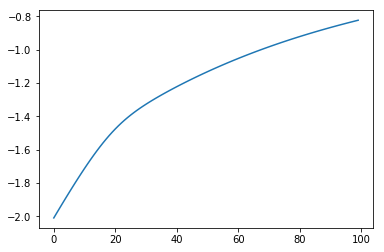

In [76]:
plt.plot(loss)
plt.show()

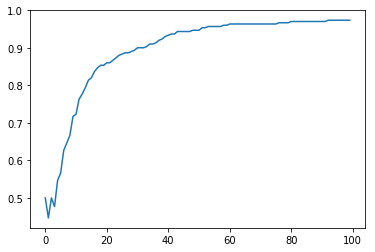

0.973333333333


In [87]:
plt.plot(acc)
plt.show()
print acc[-1]

In [63]:
from sklearn.linear_model import LogisticRegression

In [64]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [65]:
lr.score(X_test, y_test)

0.98333333333333328